Step 1: Basic Description (Features + Target Variable)

In [1]:
import pandas as pd


df = pd.read_csv('//content/sample_data/diabetes.csv')

# Show data info (columns, types, missing values)
df.info()

# Show first few rows for reference
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Histogram of Glucose Levels

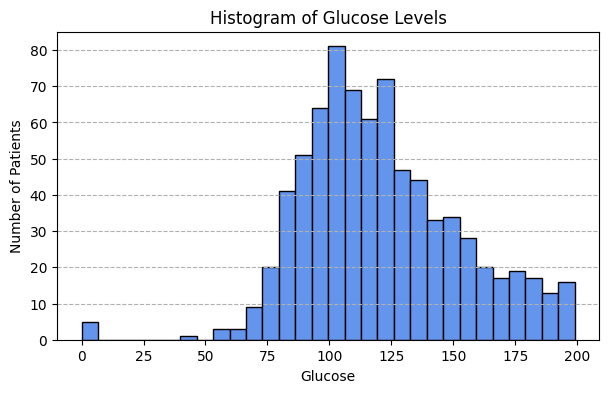

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(7,4))
plt.hist(df['Glucose'], bins=30, color='cornflowerblue', edgecolor='black')
plt.title('Histogram of Glucose Levels')
plt.xlabel('Glucose')
plt.ylabel('Number of Patients')
plt.grid(axis='y', linestyle='--')
plt.show()


Bar Plot of Diabetes Outcome

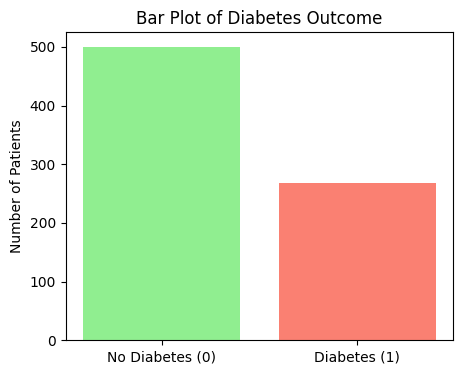

In [3]:
outcome_counts = df['Outcome'].value_counts().sort_index()
plt.figure(figsize=(5,4))
plt.bar(['No Diabetes (0)','Diabetes (1)'], outcome_counts, color=['lightgreen','salmon'])
plt.title('Bar Plot of Diabetes Outcome')
plt.ylabel('Number of Patients')
plt.show()


Boxplot of BMI by Outcome

/tmp/ipython-input-4-830267438.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Outcome', y='BMI', data=df, palette='pastel')


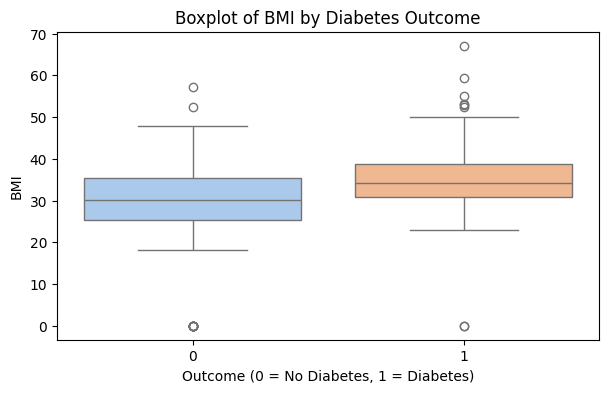

In [4]:
import seaborn as sns

plt.figure(figsize=(7,4))
sns.boxplot(x='Outcome', y='BMI', data=df, palette='pastel')
plt.title('Boxplot of BMI by Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('BMI')
plt.show()


Pie Chart of Diabetes Outcome

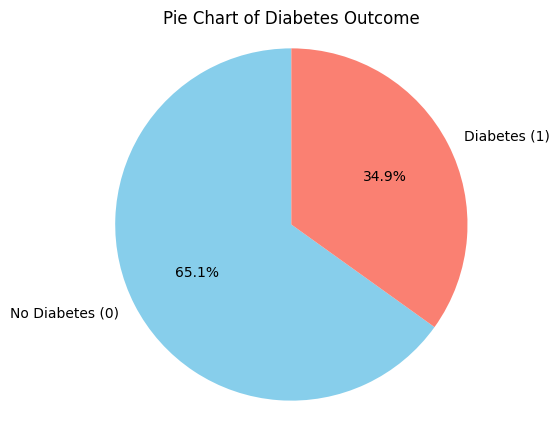

In [5]:
plt.figure(figsize=(5,5))
labels = ['No Diabetes (0)', 'Diabetes (1)']
sizes = df['Outcome'].value_counts().sort_index()
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['skyblue','salmon'], startangle=90)
plt.title('Pie Chart of Diabetes Outcome')
plt.axis('equal')
plt.show()


Step 3: Distribution Analysis

1. Summary Statistics Table

In [6]:
# Show detailed summary statistics for all columns
desc = df.describe().T
print(desc)


                          count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinT

2. Check for Zeros (Possible Missing Values) in Key Features

In [7]:
# List columns where zero is likely to mean missing
columns_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for col in columns_with_zeros:
    zero_count = (df[col] == 0).sum()
    print(f"{col}: {zero_count} zeros")


Glucose: 5 zeros
BloodPressure: 35 zeros
SkinThickness: 227 zeros
Insulin: 374 zeros
BMI: 11 zeros


3. Skewness for Each Feature

In [8]:
# Skewness measures (values >1 or <-1 mean highly skewed)
print(df.skew())


Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


4. Boxplots for Visual Outlier Detection (All Features)

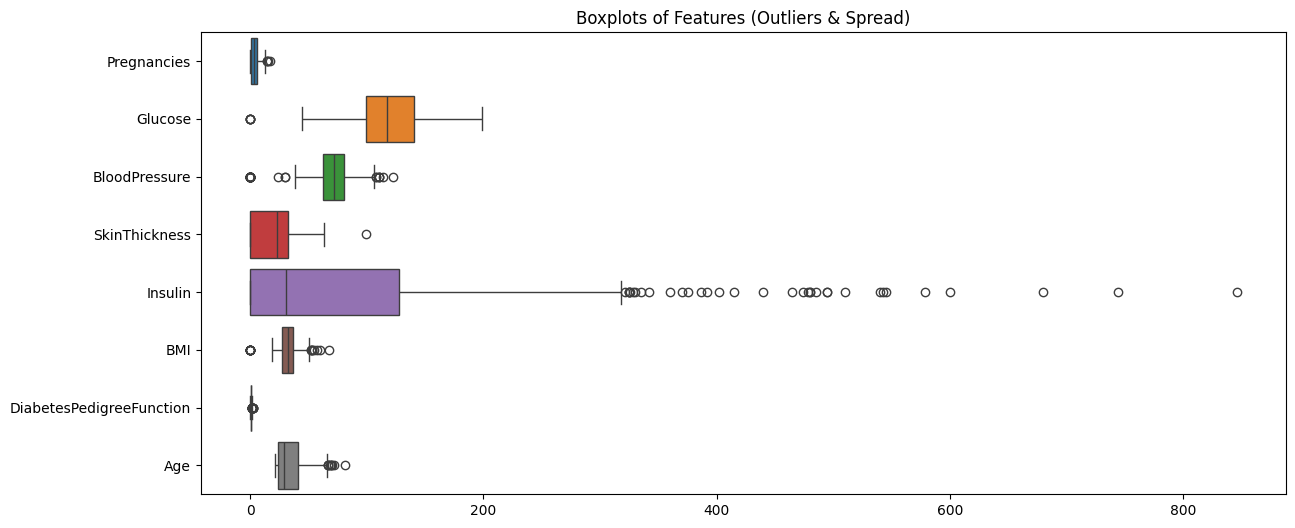

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

df_no_target = df.drop(columns='Outcome')
plt.figure(figsize=(14,6))
sns.boxplot(data=df_no_target, orient="h")
plt.title('Boxplots of Features (Outliers & Spread)')
plt.show()


 Class Balance / Category Distribution

In [10]:
# Counts and percentages for each Outcome class
counts = df['Outcome'].value_counts()
percentages = df['Outcome'].value_counts(normalize=True) * 100
print("Counts:\n", counts)
print("Percentages:\n", percentages.round(1))


Counts:
 Outcome
0    500
1    268
Name: count, dtype: int64
Percentages:
 Outcome
0    65.1
1    34.9
Name: proportion, dtype: float64


 Compute Correlation Matrix

In [11]:
# Compute the correlation matrix for all features including Outcome
corr_matrix = df.corr()
print(corr_matrix)


                          Pregnancies   Glucose  BloodPressure  SkinThickness  \
Pregnancies                  1.000000  0.129459       0.141282      -0.081672   
Glucose                      0.129459  1.000000       0.152590       0.057328   
BloodPressure                0.141282  0.152590       1.000000       0.207371   
SkinThickness               -0.081672  0.057328       0.207371       1.000000   
Insulin                     -0.073535  0.331357       0.088933       0.436783   
BMI                          0.017683  0.221071       0.281805       0.392573   
DiabetesPedigreeFunction    -0.033523  0.137337       0.041265       0.183928   
Age                          0.544341  0.263514       0.239528      -0.113970   
Outcome                      0.221898  0.466581       0.065068       0.074752   

                           Insulin       BMI  DiabetesPedigreeFunction  \
Pregnancies              -0.073535  0.017683                 -0.033523   
Glucose                   0.331357  0.221

Plot the Correlation Heatmap

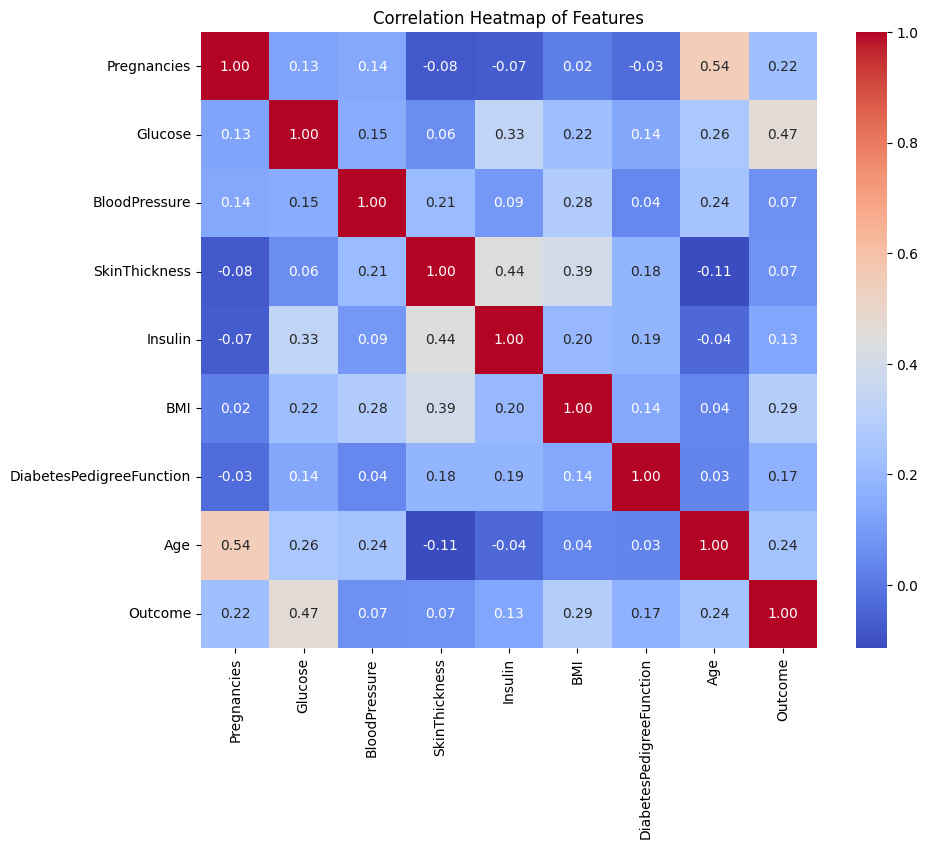

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap of Features')
plt.savefig('correlation_heatmap.png', dpi=300, bbox_inches='tight')  # This line saves the image
plt.show()


In [15]:
from google.colab import files
files.download('correlation_heatmap.png')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>